<a href="https://colab.research.google.com/github/kaashcro/MAT421-ComputationalMethods/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lagrange Polynomial Interpolation

In [25]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [26]:
x=np.linspace(0,10,11) #setting up data for interpolation
y=[0,1,3,6,3,0,1,5,7,10,15]
lagrange_function = lagrange(x, y) #finds the equation that fits the data that I put in by going through the integrations
print(lagrange_function)

            10            9           8          7         6         5
-3.445e-05 x  + 0.001743 x - 0.03828 x + 0.4784 x - 3.738 x + 18.81 x
          4         3         2
 - 60.09 x + 114.8 x - 115.1 x + 45.95 x


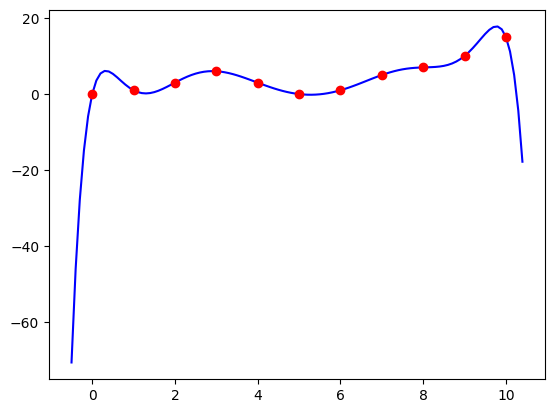

In [40]:
x_new = np.arange(-0.5, 10.5, 0.1)
plt.plot(x_new, lagrange_function(x_new), 'b', x, y, 'ro')

Newtonian Polynomial Interpolation

In [44]:
def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

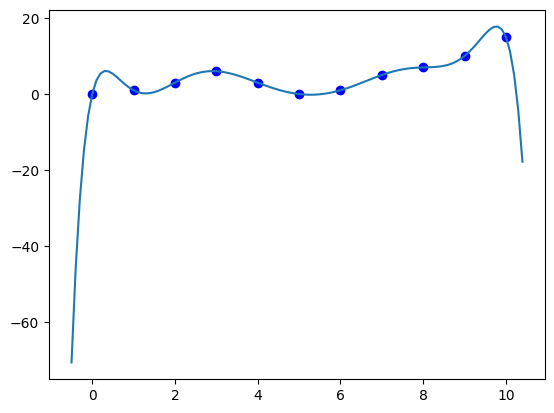

In [47]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,1,3,6,3,0,1,5,7,10,15])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]
# evaluate on new data points
x_new = np.arange(-0.5, 10.5, 0.1)
y_new = newton_poly(a_s, x, x_new)
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)